In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
# reading dataset

df=pd.read_csv("./predictive_maintenance.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


# Data Preprocessing

In [5]:
# Dropping unecessary columns

df = df.drop(["UDI","Product ID"],axis=1)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [6]:
## Converting temperature in centigrate from Kelvin [1 K = -272.15 °C  ] 

df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

In [7]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,25.95,36.45,1551,42.8,0,0,No Failure
1,L,26.05,36.55,1408,46.3,3,0,No Failure
2,L,25.95,36.35,1498,49.4,5,0,No Failure
3,L,26.05,36.45,1433,39.5,7,0,No Failure
4,L,26.05,36.55,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,26.65,36.25,1604,29.5,14,0,No Failure
9996,H,26.75,36.25,1632,31.8,17,0,No Failure
9997,M,26.85,36.45,1645,33.4,22,0,No Failure
9998,H,26.85,36.55,1408,48.5,25,0,No Failure


In [8]:
# Renaming temperature in Centigrate(°C) from Kelvin (K)

df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

In [9]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
9470,H,26.45,37.25,1439,47.1,149,0,No Failure,10.8
7574,L,28.25,38.95,1487,37.4,162,0,No Failure,10.7
5713,L,30.05,39.75,1596,38.0,156,0,No Failure,9.7
4123,M,29.95,38.45,1517,38.9,2,0,No Failure,8.5
8794,M,25.25,36.35,1497,36.4,56,0,No Failure,11.1


In [10]:
df

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5
2,L,25.95,36.35,1498,49.4,5,0,No Failure,10.4
3,L,26.05,36.45,1433,39.5,7,0,No Failure,10.4
4,L,26.05,36.55,1408,40.0,9,0,No Failure,10.5
...,...,...,...,...,...,...,...,...,...
9995,M,26.65,36.25,1604,29.5,14,0,No Failure,9.6
9996,H,26.75,36.25,1632,31.8,17,0,No Failure,9.5
9997,M,26.85,36.45,1645,33.4,22,0,No Failure,9.6
9998,H,26.85,36.55,1408,48.5,25,0,No Failure,9.7


In [11]:
display(df.shape)
display(df.size)

(10000, 9)

90000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         10000 non-null  object 
 1   Air temperature [°C]         10000 non-null  float64
 2   Process temperature [°C]     10000 non-null  float64
 3   Rotational speed [rpm]       10000 non-null  int64  
 4   Torque [Nm]                  10000 non-null  float64
 5   Tool wear [min]              10000 non-null  int64  
 6   Target                       10000 non-null  int64  
 7   Failure Type                 10000 non-null  object 
 8   Temperature difference [°C]  10000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 703.3+ KB


In [13]:
df.describe().style.background_gradient(cmap="magma")

,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature difference [°C]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000,12.100000


# Exploratory data Analysis

In [14]:
df["Air temperature [°C]"].min()

23.150000000000034

In [15]:
df["Air temperature [°C]"].max()

32.35000000000002

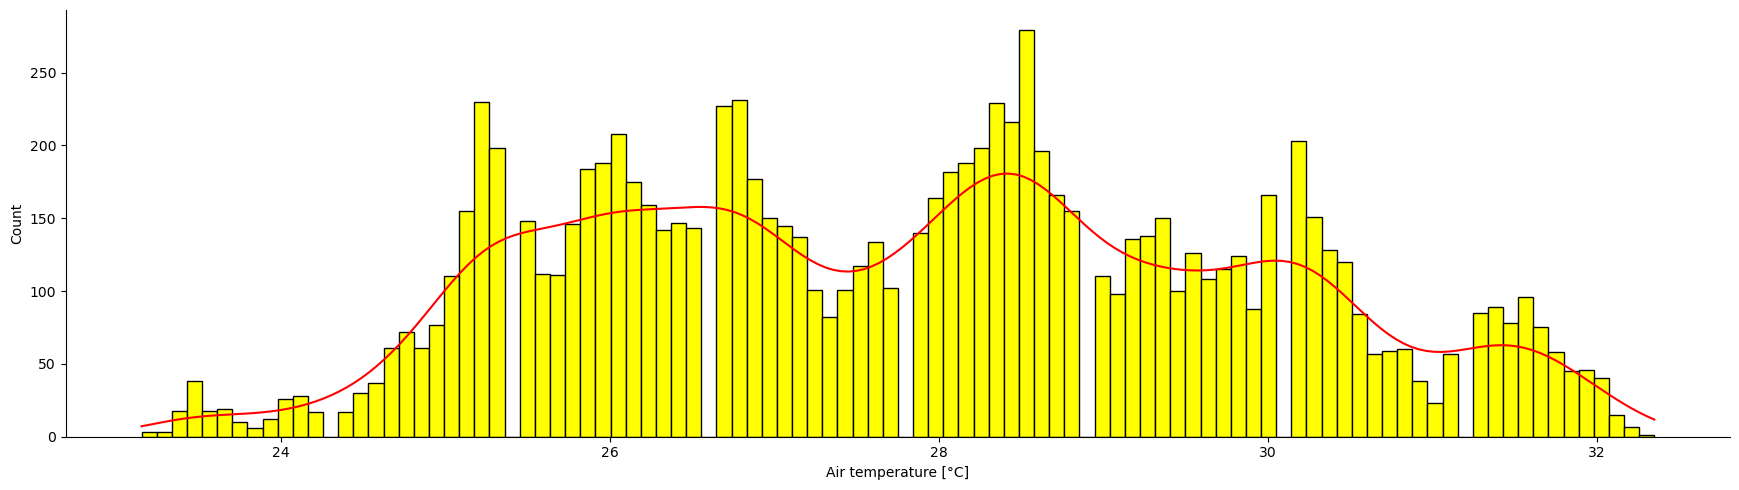

In [16]:
sns.displot(data=df, x="Air temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "yellow",height = 5, aspect = 3.5);

In [17]:
df["Process temperature [°C]"].min()

33.55000000000001

In [18]:
df["Process temperature [°C]"].max()

41.650000000000034

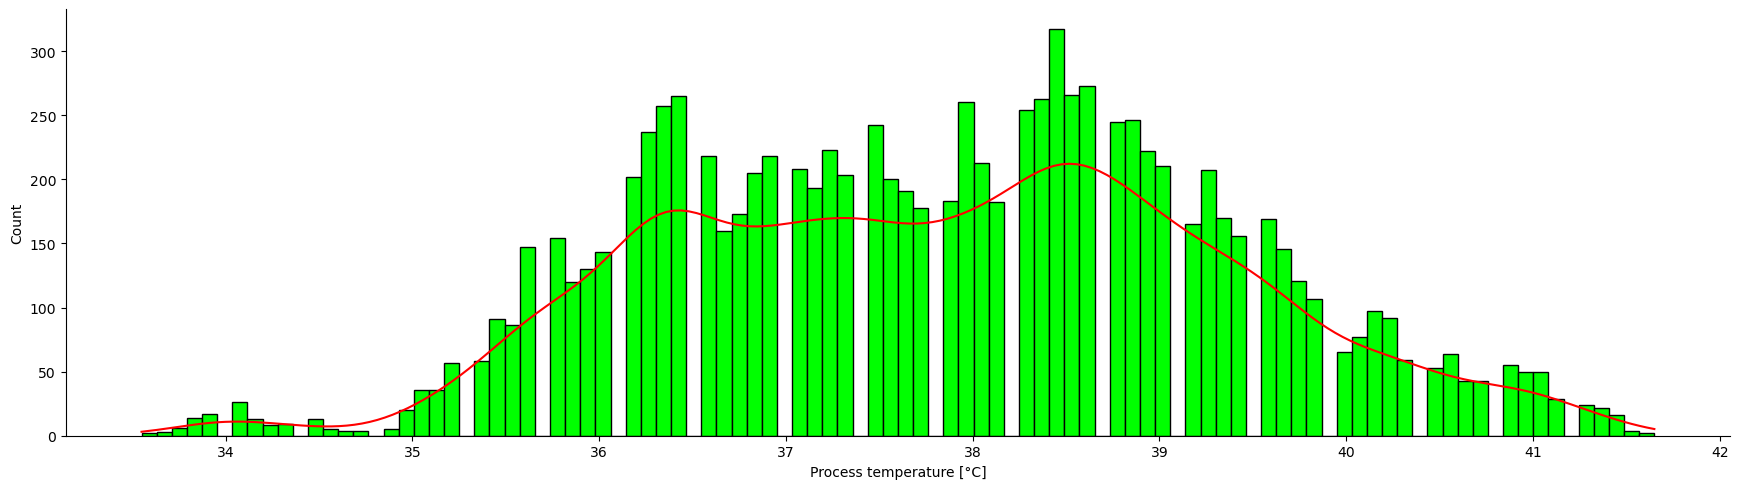

In [19]:
sns.displot(data=df, x="Process temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "lime",height = 5, aspect = 3.5);

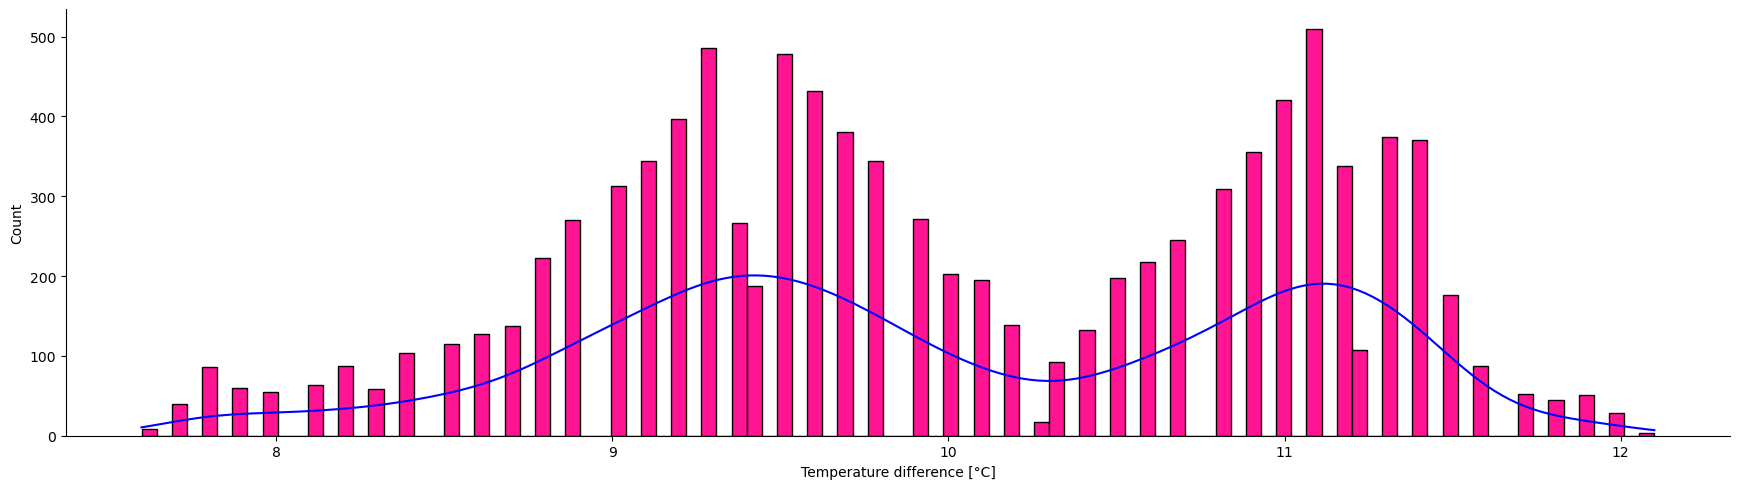

In [20]:
sns.displot(data=df, x="Temperature difference [°C]", kde=True, bins = 100,color = "blue", facecolor = "DeepPink",height = 5, aspect = 3.5);

In [21]:
for col in df[['Type','Target','Failure Type']]:
    print(df[col].value_counts()) 
    print("****"*8)

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
********************************
Target
0    9661
1     339
Name: count, dtype: int64
********************************
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64
********************************


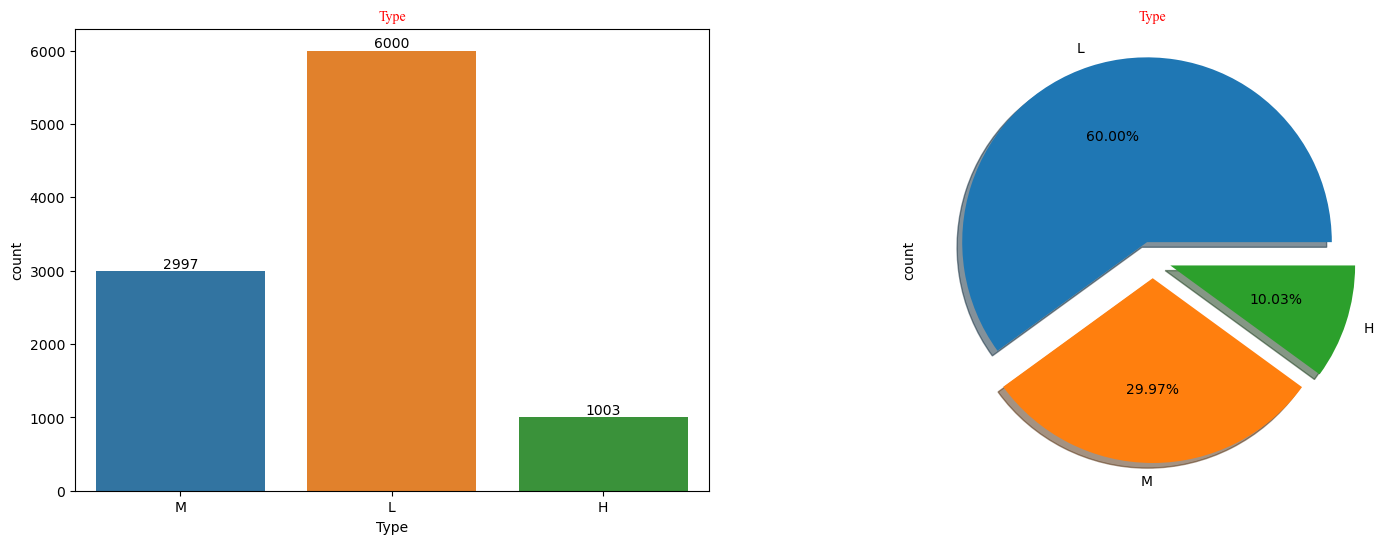

In [22]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Type", fontsize=20,color='Red',font='Times New Roman')

ax =plt.subplot(1,2,2)
ax=df['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Type", fontsize = 20,color='Red',font='Times New Roman');

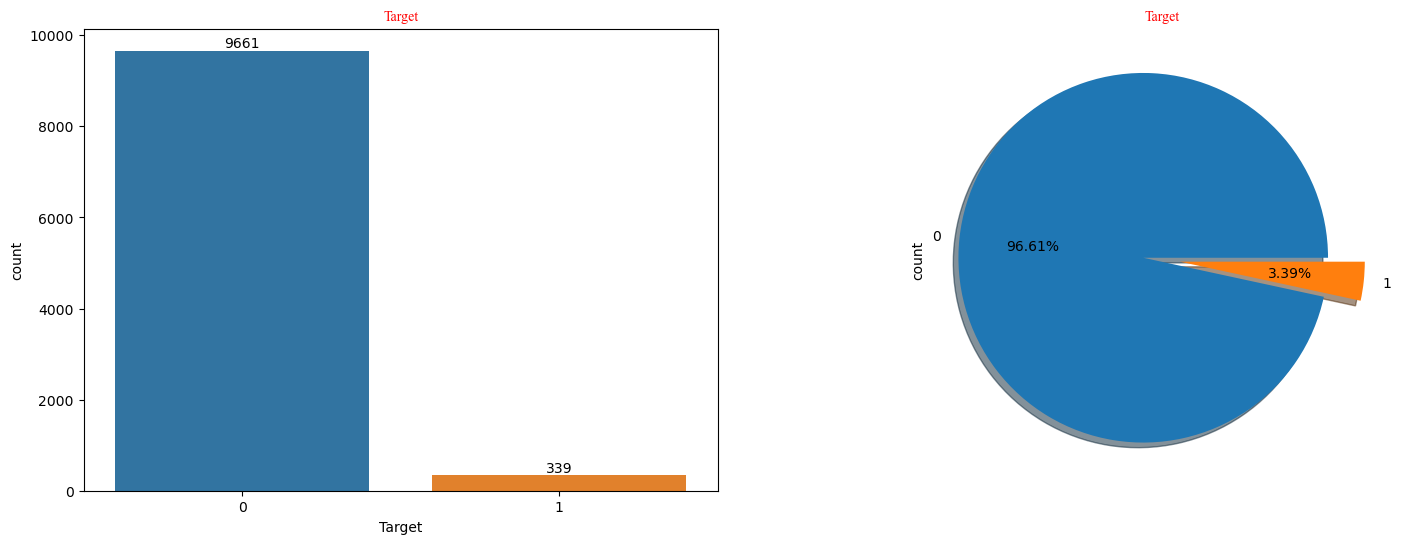

In [23]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Target', data=df)
ax.bar_label(ax.containers[0])
plt.title("Target", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Target'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Target", fontsize = 20,color='Red',font='Times New Roman');

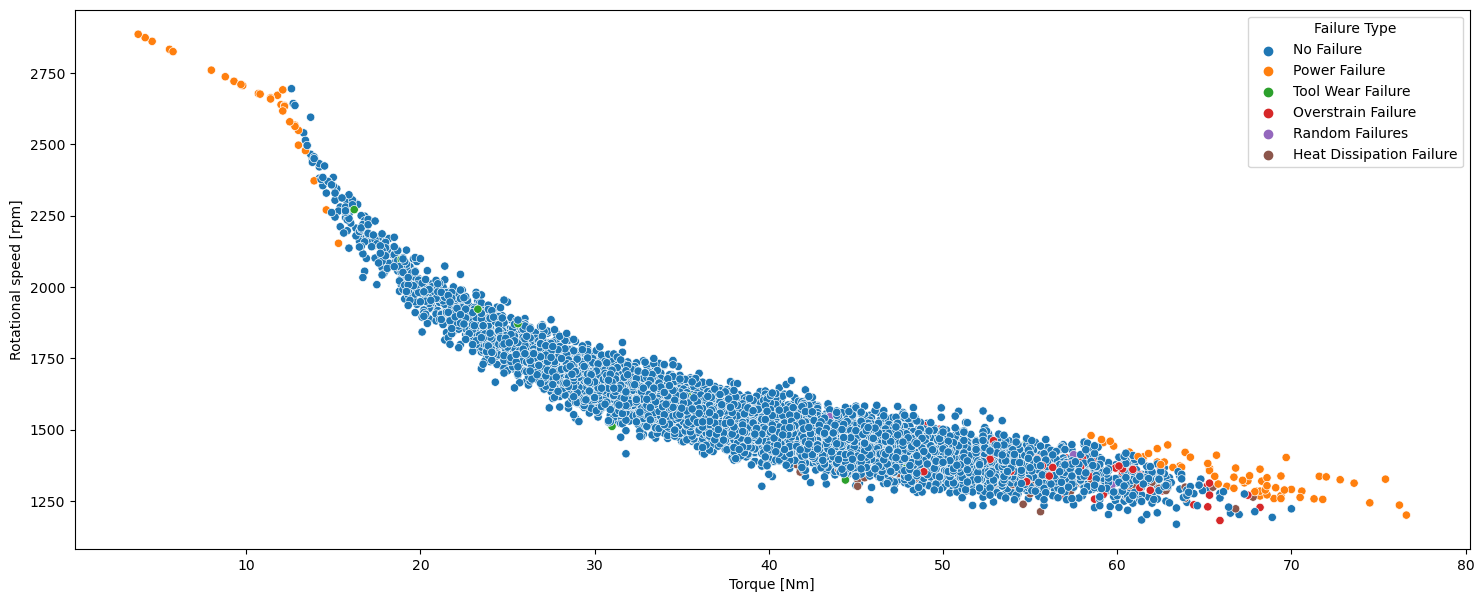

In [24]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",palette="tab10");

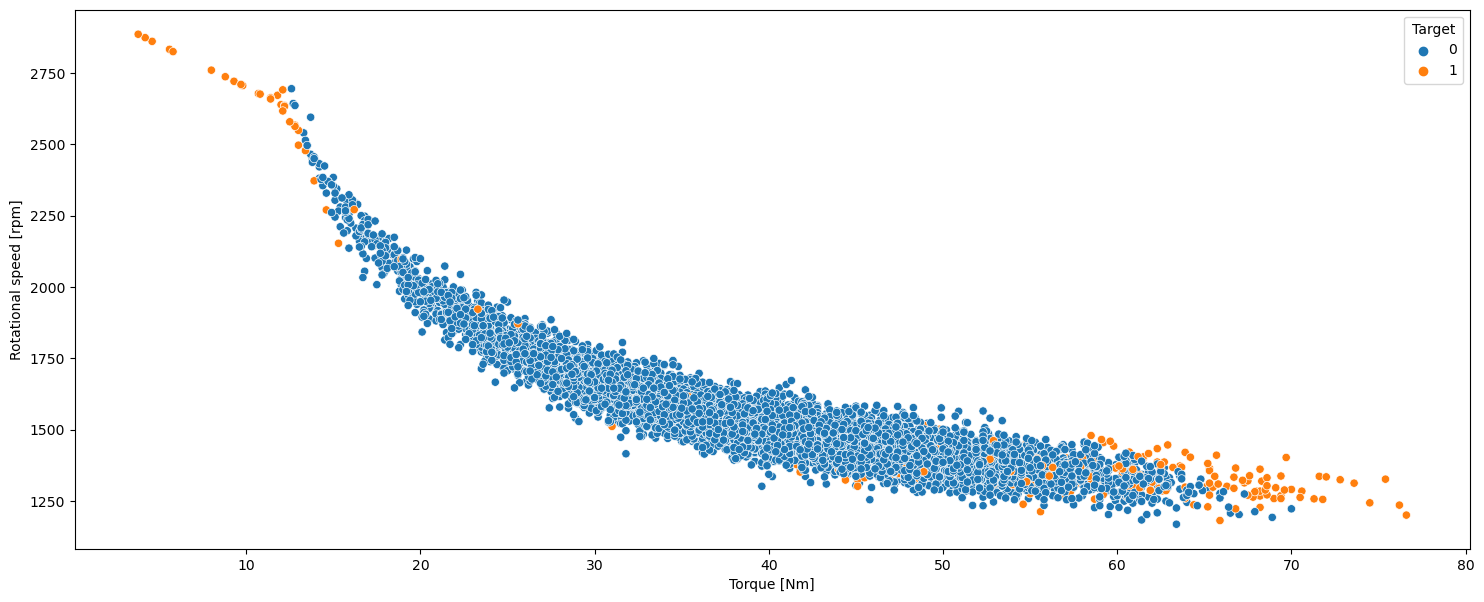

In [25]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="tab10");

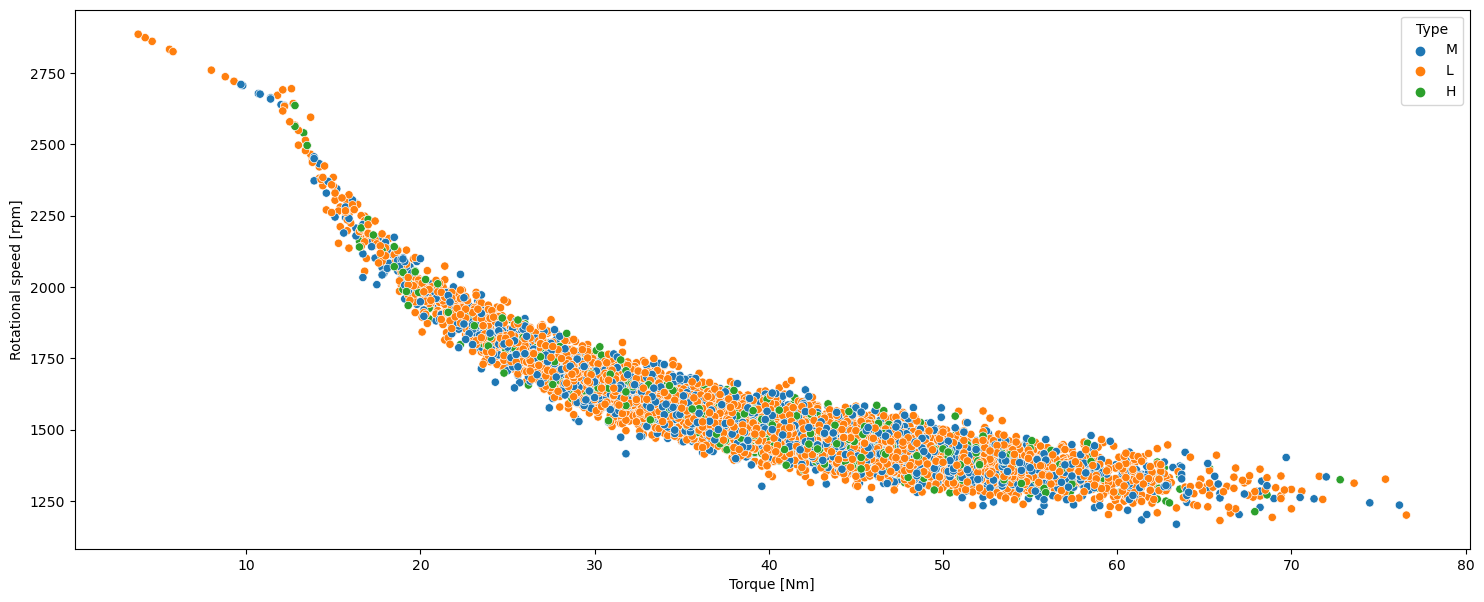

In [26]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type",palette="tab10");

# Feature Selection

In [27]:
# using ordinal encoder

import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type'])
df = encoder.fit_transform(df)
df.head(78)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,1,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,2,26.05,36.55,1408,46.3,3,0,No Failure,10.5
2,2,25.95,36.35,1498,49.4,5,0,No Failure,10.4
3,2,26.05,36.45,1433,39.5,7,0,No Failure,10.4
4,2,26.05,36.55,1408,40.0,9,0,No Failure,10.5
...,...,...,...,...,...,...,...,...,...
73,2,26.85,36.95,1592,35.0,200,0,No Failure,10.1
74,2,26.75,36.85,1601,32.3,202,0,No Failure,10.1
75,2,26.65,36.75,1379,46.7,204,0,No Failure,10.1
76,2,26.65,36.75,1461,47.9,206,0,No Failure,10.1


In [28]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

In [29]:
df.head(78)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,1,25.95,36.45,1551,42.8,0,0,1,10.5
1,2,26.05,36.55,1408,46.3,3,0,1,10.5
2,2,25.95,36.35,1498,49.4,5,0,1,10.4
3,2,26.05,36.45,1433,39.5,7,0,1,10.4
4,2,26.05,36.55,1408,40.0,9,0,1,10.5
...,...,...,...,...,...,...,...,...,...
73,2,26.85,36.95,1592,35.0,200,0,1,10.1
74,2,26.75,36.85,1601,32.3,202,0,1,10.1
75,2,26.65,36.75,1379,46.7,204,0,1,10.1
76,2,26.65,36.75,1461,47.9,206,0,1,10.1


In [30]:
X = df.drop(columns="Failure Type" , axis=1)
y = df["Failure Type"]

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

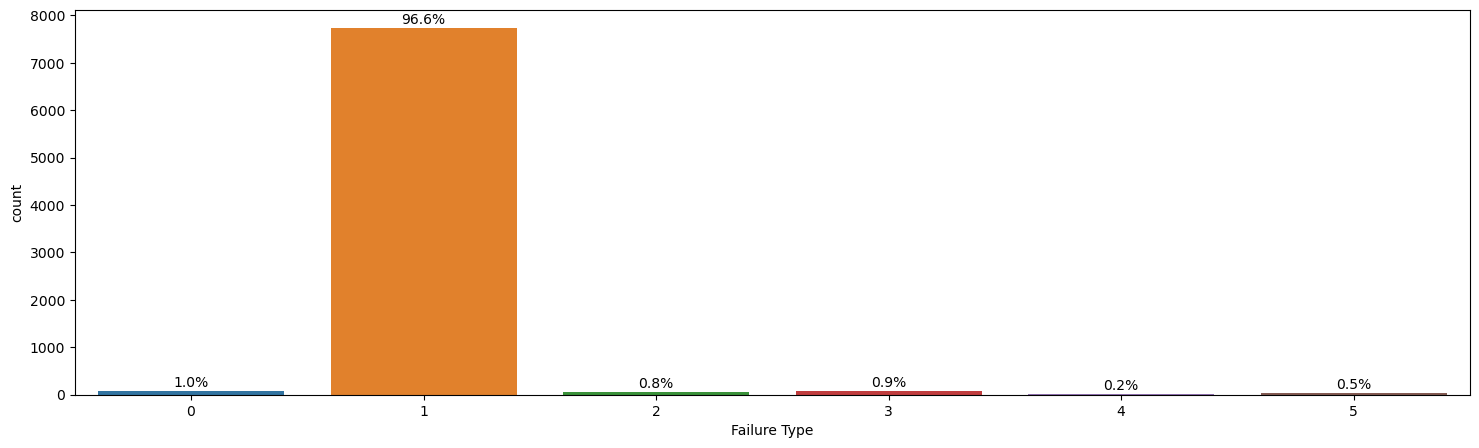

In [32]:
# Count Plot of the Target Variable (Failure Type) in TRAIN Set

plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_train, palette = 'tab10')
t= len(y_train)

for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

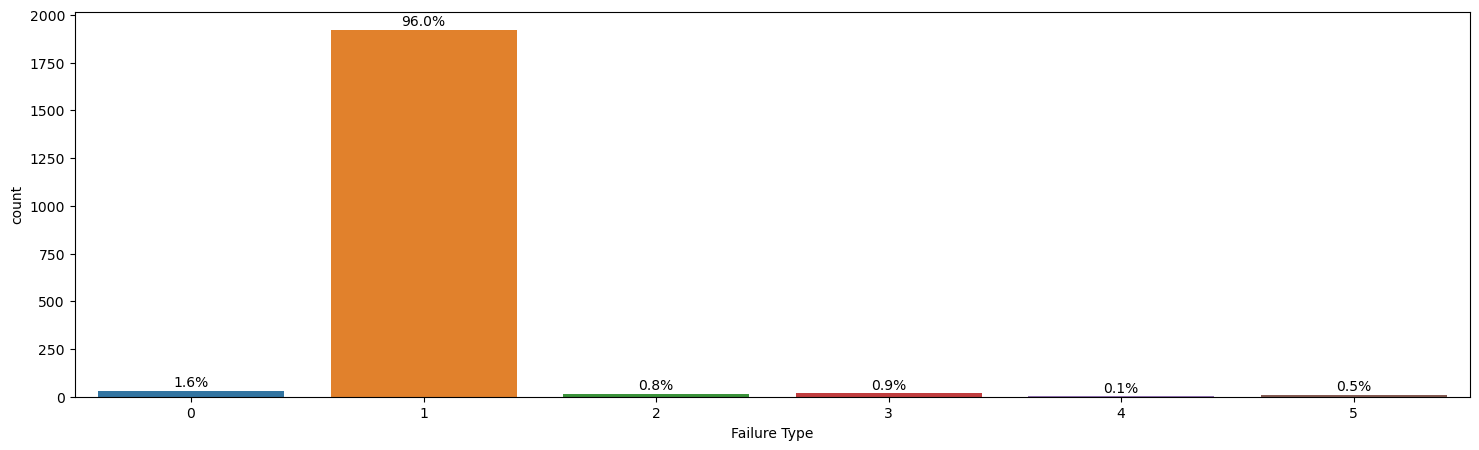

In [33]:
# Count Plot of the Target Variable (Failure Type) in TEST Set

plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_test, palette = 'tab10')
t= len(y_test)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

# Training

# Logistic Regression

Training Accuracy    : 96.73 %
Model Accuracy Score : 96.25 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.96      1.00      0.98      1921
           2       0.67      0.38      0.48        16
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         9

    accuracy                           0.96      2000
   macro avg       0.27      0.23      0.24      2000
weighted avg       0.93      0.96      0.95      2000

--------------------------------------------------------


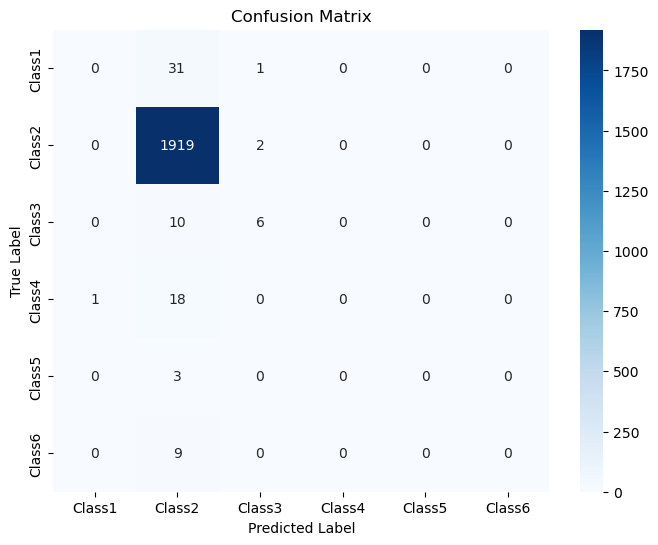

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_test, y_pred_lr) * 100, 2)

print("Training Accuracy    :", log_train, "%")
print("Model Accuracy Score :", log_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

# Specify the class labels
classes = ['Class1', 'Class2', 'Class3', 'Class4', 'Class5', 'Class6']

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_lr, classes=classes)


# Decision Tree Classifier

Training Accuracy    : 100.0 %
Model ccuracy Score : 99.35 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       1.00      1.00      1.00      1921
           2       0.92      0.69      0.79        16
           3       0.81      0.89      0.85        19
           4       0.00      0.00      0.00         3
           5       0.82      1.00      0.90         9

    accuracy                           0.99      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.99      0.99      0.99      2000

--------------------------------------------------------


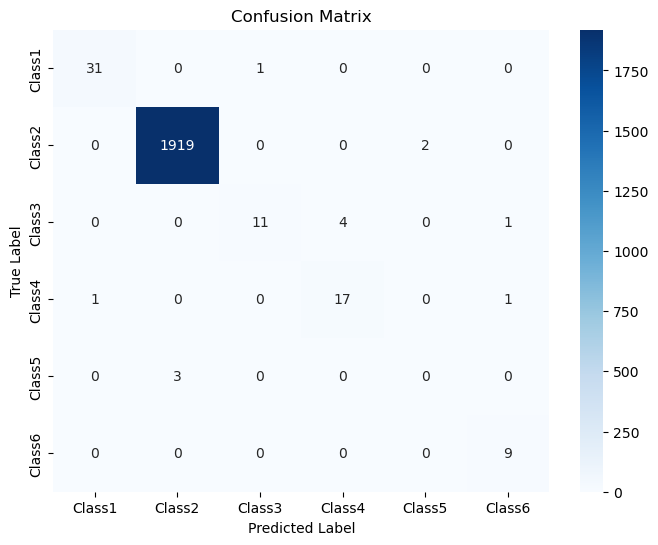

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Decision Tree
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_test, y_pred_dec) * 100, 2)

print("Training Accuracy    :", decision_train, "%")
print("Model ccuracy Score :", decision_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

# Specify the class labels
classes = ['Class1', 'Class2', 'Class3', 'Class4', 'Class5', 'Class6']

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_dec, classes=classes)

# Random Forest Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 99.65 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       1.00      1.00      1.00      1921
           2       1.00      0.94      0.97        16
           3       0.86      0.95      0.90        19
           4       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         9

    accuracy                           1.00      2000
   macro avg       0.80      0.81      0.81      2000
weighted avg       1.00      1.00      1.00      2000

--------------------------------------------------------


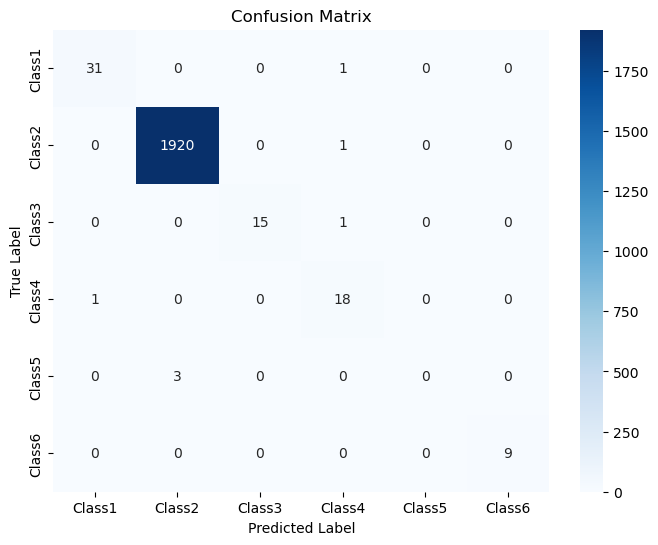

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :", random_forest_train, "%")
print("Model Accuracy Score :", random_forest_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

# Specify the class labels
classes = ['Class1', 'Class2', 'Class3', 'Class4', 'Class5', 'Class6']

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_rf, classes=classes)

# Support Vector Classifier

Training Accuracy    : 96.64 %
Model Accuracy Score : 96.05 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.96      1.00      0.98      1921
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         9

    accuracy                           0.96      2000
   macro avg       0.16      0.17      0.16      2000
weighted avg       0.92      0.96      0.94      2000

--------------------------------------------------------


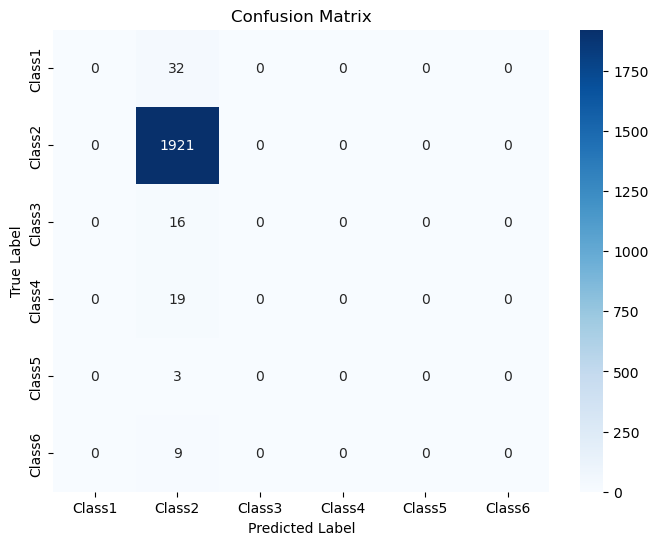

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :", svc_train, "%")
print("Model Accuracy Score :", svc_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

# Specify the class labels
classes = ['Class1', 'Class2', 'Class3', 'Class4', 'Class5', 'Class6']

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_svc, classes=classes)